### 분류 (Classification) 성능 평가 지표

#### 정확도 (Accuracy)
- 직관적으로 모델 예측 성능을 나타낼 수 있다.
- 2진 분류일 경우 데이터 구성에 따라 타겟 데이터 분포가 불균형하다면, 정확도 한 가지만으로는 적합한 성능 평가 지표가 될 수 없다.
- 강아지와 고양이 모두 무조건 생존으로 예측하는 모델이 있다고 가정한다.  
  생존한 강아지 80마리와 사망한 고양이 20마리를 테스트하면, 정확도는 80%이다.
  이 모델을 사용하면, 사망한 강아지 혹은 고양이를 절대 예측할 수 없다.

<img src="./images/accuracy.png" width="400px">

#### 오차 행렬 (Confusion Matrix)
- 학습된 분류 모델이 예측을 수행하면서 얼마나 예측에 오류가 있는지도 함께 보여주는 지표이다.
- 데이터가 한 곳으로 치우친 것도 확인할 수 있으며, TP, TN, FP, FN, 4가지로 구성되어 있다.
- 오차 행렬로 분류 성능 평가 지표의 모든 것을 구할 수 있다(정확도, 정밀도, 재현율, F1 Score, ROC AUC)

<img src="./images/confusion_matrix01.png" width="600px">  

1. TN: 예측한 값은 음성이고, 실제 값도 음성일 때 (맞춤)
2. FP: 예측한 값은 양성이고, 실제 값은 음성일 때 (틀림)
3. FN: 예측한 값은 음성이고, 실제 값은 양성일 때 (틀림)
4. TP: 예측한 값은 양성이고, 실제 값도 양성일 때 (맞춤)

- 위 강아지와 고양이의 생존률 예측 모델의 오차 행렬은 다음과 같이 나온다.  
  
<img src="./images/confusion_matrix02.png" width="600px">  

- 100마리 전부 생존(음성, Negative)으로 예측했으며, 그 중 80마리는 실제 음성이고, 나머지 20마리는 실제 양성이기 때문이다.
- 보통 2진 분류일 경우 음성과 양성을 구분하는 의료학, 연구분야 등에서 많이 사용되며, 두 가지 상황으로 나눌 수 있다.
> 1. 질병이나 이상이 없는데도 양성으로 오진하는 것을 방지하기 위해
>> - 특이도(Specificity): 정상을 정상으로 진단하는 비율(▲TN)
>> - 재현율(Recall)이 낮아지고 정밀도(Precision)가 높아질 수 있다.
> 2. 암 진단에서 양성인 환자를 놓치지 않고 최대한 많이 식별하기 위해
>> - 민감도(Sensitivity): 질병이 있는 사람을 질병이 있다고 진단하는 비율(▲TP)
>> - 재현율(Recall)이 높아지고 정밀도(Precision)가 낮아질 수 있다.

- 1.의 경우 Positive보다는 Negative 예측 정확도를 높일 것이다.  
  ▲TN, ▼TP, 또한, Positive로 예측하는 경우가 매우 작기 때문에, ▼FP
- 2.의 경우 Negative보다는 Positive 예측 정확도를 높일 것이다.  
  ▲TP, ▼TN, 또한, Negative로 예측하는 경우가 매우 작기 때문에, ▼FN
- 📌결과적으로 정확한 판단이 아님에도 불구하고 정확도가 매우 높게 나타나는, 수치적인 판단 오류를 해결해기 위해서는 특이도와 민감도를 잘 조절해야한다.  

#### 정밀도 (Precision)
- 예측을 Positive로 한 대상 중, 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다.
- ▲TP, ▼FP일 경우 정밀도가 상승한다.
- precision_score()를 사용하여 정밀도를 구할 수 있다.

#### 재현율 (Recall)
- 실제 값이 Positive인 대상 중, 얼마나 놓치지 않고 Positive로 예측했는 가의 비율을 뜻한다.
- ▲TP, ▼FN일 경우 재현율이 상승한다.
- recall_score()를 사용하여 재현율을 구할 수 있다.

#### 정밀도와 재현율의 트레이드 오프 (Trade-off)
- 분류 시, 결정 임계값(Threshold)을 조정해서 정밀도 또는 재현율의 수치를 높일 수 있다.

> 가정: 구급대원 AI가 교통사고 현장에서 피해자를 병원으로 이송해야할지 판단해야 하는 시나리오.
> - Dead (Positive): 피해자가 이미 사망했을 경우
> - Alive (Negative): 피해자가 아직 살아있을 경우  

> - TP: 모델이 Dead를 Dead로 올바르게 분류한 경우
> - FP: 모델이 Alive를 Dead로 잘못 분류한 경우 (error I)
> - TN: 모델이 Alive를 Alive로 올바르게 분류한 경우
> - FN: 모델이 Dead를 Alive로 잘못 분류한 경우 (error II)

> - error I의 비용(FP)은 error II의 비용(FN)보다 훨씬 더 나쁘다! ▼FP, ▼error I
> <img src="./images/threshold.png" width="500px">

> - 정밀도 (Precision): 모델이 Dead로 예측한 환자 중에서 실제로 Dead인 환자의 비율을 나타낸다. 즉, 양성으로 예측한 결과 중 얼마나 많은 것이 진짜 양성인지 측정한다.  
> - 재현율 (Recall): 실제 Dead 피해자 중에서 모델이 Dead로 정확하게 예측한 피해자의 비율을 나타낸다. 즉, 모델이 얼마나 많은 Dead 피해자를 "놓치지 않고" 감지했는지 측정한다.  

> - 이는 정밀도를 높여야 하며, Threshold(임계값)을 높여서 FP를 낮추고(▲정밀도), FN을 높여야 한다(▼재현율).
> - 즉, Negative(Alive)로 예측할 확률이 높아져야 생명을 구할 확률이 높아지고, Threshold value(임계값)를 높여주는 것이다.
> - 위의 시나리오처럼 한 쪽의 수치를 강제로 높이면 다른 한 쪽의 수치는 떨어지며,  
  이를 정밀도와 재현율의 "트레이드 오프"라고 한다.
> - 임계치가 높아지면 정밀도가 높아진다. 반대로 임계치가 낮아지면 재현율이 높아진다.

#### F1 Score
- 2진 분류 모델의 성능을 평가하는 지표 중 하나이다.
- 정밀도(Precision)와 재현율(Recall)의 조화 평균으로 계산되는 성능 측정 지표이다.
- 정확도(Accuracy)와 같이 전체 성능에 대한 지표가 아닌 타겟 데이터별 성능을 자세히 분석하는 평가지표이다.
- 정밀도(Precision)와 재현율(Recall), 두 개의 평가 지표를 모두 고려하여 예측 성능을 평가하기 때문에 두 지표의 평균치를 구하는 조화 평균을 사용하여 조금 더 정확하게 모델의 예측 성능을 평가할 수 있다.
- 텍스트 분류, 정보 검색, 암 진단 등에서 사용되는 모델의 성능을 평가할 수 있다.

<img src="./images/trade_off.png" width="600px">  

- F1 Score는 0~1까지 점수를 매길 수 있으며, 0에 가까울 수록 정밀도와 재현율 모두 낮다는 뜻이다.

#### ROC Curve, AUC
- ROC(Receiver Operating Characteristic)는 수신기 동작 특성이라는 뜻이고, 이러한 이름이 붙은 이유는 2차 세계대전 때 무선 기기 성능 평가 때 사용되었기 때문이다.
- FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선이며, FPR이 급격히 떨어지더라도 TPR은 천천히 떨어지는 것이 좋은 성능을 가진 모델로 판단한다.

<img src="./images/roc_auc.png" width="500px" style="margin-left: 20px">

- AUC(Area Under the Curve)는 ROC 곡선 밑의 면적을 구한 것으로서, 일반적으로 1에 가까울 수록 좋은 수치이다.
- ROC Curve가 축에 붙을 수록(좌상단 모서리) 좋은 성능을 나타내는 것이며, 높이와 밑변이 1인 사각형으로 가정했을 경우 ROC Curve가 축에 붙을 수록 AUC 면적이 넓어지며 1에 가까워진다.
- 모델이 양성과 음성을 얼마나 잘 분류하는지 시각화할 수 있다.
- 보통 F1 Score가 0.7이상일 경우 좋은 모델이라고 간주한다.

<img src="./images/evaluation.png" width="230px">

### 피마 인디언 당뇨병 예측
- 이진 분류 (Binary Classification)

#### Feature
- Pregnancies : 임신 횟수
- Glucose : 경구 포도당 내성 시험에서 2시간 동안 혈장 포도당 농도
- BloodPressure : 혈압 (mm Hg)
- SkinThickness: 삼두근 피부 두께 (mm)
- Insulin: 2시간 혈청 인슐린 (mu U/ml)
- BMI: 체질량지수(kg/(height in m)<sup>2</sup>)
- DiabetesPedigreeFunction: 당뇨병 혈통 기능(유전)
- Age: 나이(만 나이)

#### Target
- Outcome: 클래스 변수 (0, 음성 또는 1, 양성) 268/768은 1이고 나머지는 0입니다

In [1]:
import pandas as pd

pima_df = pd.read_csv('./datasets/pima_indians_diabetes.csv')
pima_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
pima_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [3]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
pima_df.duplicated().sum()

0

In [5]:
pima_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


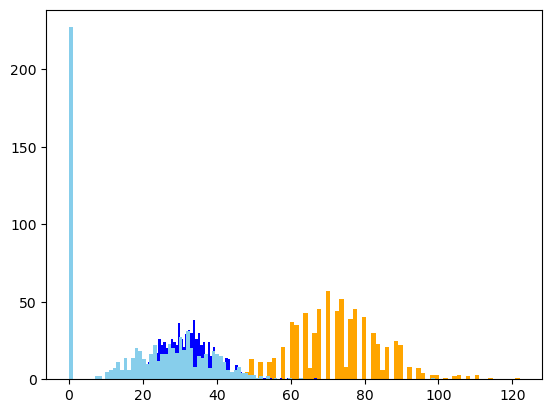

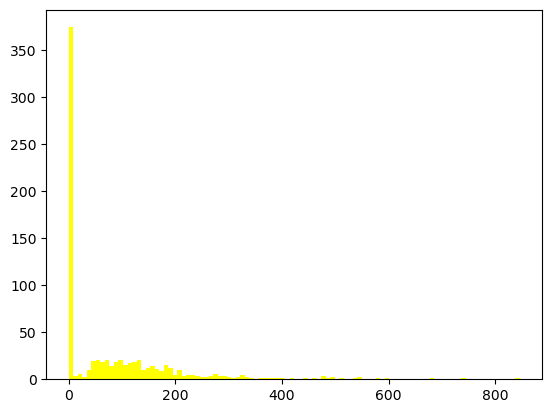

In [6]:
import matplotlib.pyplot as plt

plt.hist(pima_df['BloodPressure'], bins=100, color="orange")
plt.hist(pima_df['BMI'], bins=100, color="blue")
plt.hist(pima_df['SkinThickness'], bins=100, color="skyblue")
plt.show()

plt.hist(pima_df['Insulin'], bins=100, color="yellow")
plt.show()

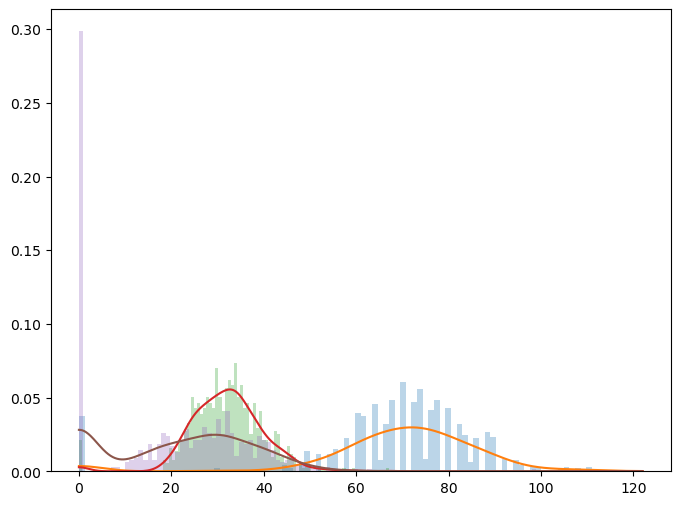

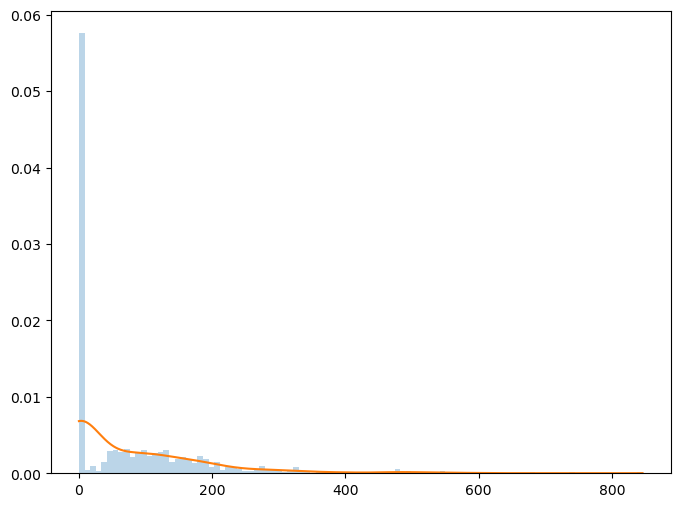

In [7]:
from scipy import stats
import numpy as np

kde = stats.gaussian_kde(pima_df['BloodPressure'])
line = np.linspace(0, 122, 768, endpoint=True)

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(pima_df['BloodPressure'], density=True, bins=100, alpha=0.3)
ax.plot(line, kde(line))

kde = stats.gaussian_kde(pima_df['BMI'])
xx = np.linspace(0, 122, 768, endpoint=True)
ax.hist(pima_df['BMI'], density=True, bins=100, alpha=0.3)
ax.plot(line, kde(line))

kde = stats.gaussian_kde(pima_df['SkinThickness'])
xx = np.linspace(0, 122, 768, endpoint=True)
ax.hist(pima_df['SkinThickness'], density=True, bins=100, alpha=0.3)
ax.plot(line, kde(line))
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
kde = stats.gaussian_kde(pima_df['Insulin'])
line = np.linspace(0, 846, 768, endpoint=True)
ax.hist(pima_df['Insulin'], density=True, bins=100, alpha=0.3)
ax.plot(line, kde(line))
plt.show()

In [8]:
import numpy as np

zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = pima_df.shape[0]

for feature in zero_features:
    zero_count = pima_df[pima_df[feature] == 0][feature].count()
    print(f'{feature}: {zero_count}건, {np.round(zero_count / total_count * 100, 4)}%')

Glucose: 5건, 0.651%
BloodPressure: 35건, 4.5573%
SkinThickness: 227건, 29.5573%
Insulin: 374건, 48.6979%
BMI: 11건, 1.4323%


In [9]:
pima_df[zero_features] = pima_df[zero_features].replace(0, pima_df[zero_features].mean())

In [10]:
import numpy as np

zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = pima_df.shape[0]

for feature in zero_features:
    zero_count = pima_df[pima_df[feature] == 0][feature].count()
    print(f'{feature}: {zero_count}건, {np.round(zero_count / total_count * 100, 4)}%')

Glucose: 0건, 0.0%
BloodPressure: 0건, 0.0%
SkinThickness: 0건, 0.0%
Insulin: 0건, 0.0%
BMI: 0건, 0.0%


In [11]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

features, targets = pima_df.iloc[:, :-1], pima_df.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': [5, 6, 7], 'min_samples_split': [7, 8, 9]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 5, 'min_samples_split': 7}",0.754072,1,0.725806,0.709677,0.774194
1,"{'max_depth': 5, 'min_samples_split': 8}",0.752433,2,0.725806,0.709677,0.774194
2,"{'max_depth': 5, 'min_samples_split': 9}",0.750793,3,0.725806,0.709677,0.774194
3,"{'max_depth': 6, 'min_samples_split': 7}",0.729640,4,0.677419,0.709677,0.822581
4,"{'max_depth': 6, 'min_samples_split': 8}",0.729640,4,0.677419,0.709677,0.822581
5,"{'max_depth': 6, 'min_samples_split': 9}",0.727975,6,0.693548,0.709677,0.822581
6,"{'max_depth': 7, 'min_samples_split': 7}",0.715177,9,0.596774,0.693548,0.741935
7,"{'max_depth': 7, 'min_samples_split': 8}",0.718456,7,0.612903,0.677419,0.741935
8,"{'max_depth': 7, 'min_samples_split': 9}",0.716790,8,0.629032,0.677419,0.741935


In [12]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 76.6234%


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[76 24]
 [12 42]]
정확도: 0.7662, 정밀도: 0.6364, 재현율: 0.7778, F1: 0.7000, ROC-AUC: 0.7689
################################################################################


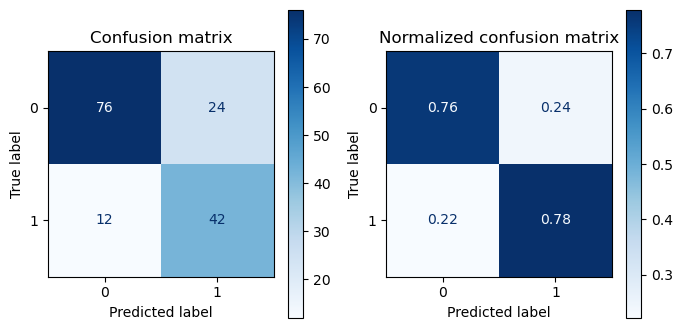

In [14]:
get_evaluation(y_test, prediction, dtc, X_test)

#### Precision / Recall Trade-off

In [15]:
proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.8589743589743589, 0.14102564102564102] 0
[0.09090909090909091, 0.9090909090909091] 1
[0.9285714285714286, 0.07142857142857142] 0
[0.09090909090909091, 0.9090909090909091] 1
[0.8589743589743589, 0.14102564102564102] 0
[0.9285714285714286, 0.07142857142857142] 0
[0.3950617283950617, 0.6049382716049383] 1
[0.09090909090909091, 0.9090909090909091] 1
[0.6857142857142857, 0.3142857142857143] 0
[0.992, 0.008] 0
[0.992, 0.008] 0
[0.992, 0.008] 0
[0.992, 0.008] 0
[1.0, 0.0] 0
[0.9285714285714286, 0.07142857142857142] 0
[0.14634146341463414, 0.8536585365853658] 1
[0.8589743589743589, 0.14102564102564102] 0
[0.125, 0.875] 1
[0.14634146341463414, 0.8536585365853658] 1
[0.6857142857142857, 0.3142857142857143] 0
[0.125, 0.875] 1
[0.992, 0.008] 0
[0.09090909090909091, 0.9090909090909091] 1
[0.992, 0.008] 0
[0.6451612903225806, 0.3548387096774194] 0
[0.09090909090909091, 0.9090909090909091] 1
[0.09090909090909091, 0.9090909090909091] 1
[1.0, 0.0] 0
[0.3950617283950617, 0.6049382716049383] 1
[0.992,

In [16]:
from sklearn.preprocessing import Binarizer

proba = [[ 0.4, 0.7,  0.9],
     [ 0.2,  0,  0.3],
     [ 0.5,  0.6, 1]]

binarizer = Binarizer(threshold=0.1)
print(binarizer.fit_transform(proba))

[[1. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]


In [17]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

In [18]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[76 24]
 [12 42]]
정확도: 0.7662, 정밀도: 0.6364, 재현율: 0.7778, F1: 0.7000, ROC-AUC: 0.7689
################################################################################


In [19]:
thresholds = [0.24, 0.3, 0.4, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.7]

def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

get_evaluation_by_thresholds(y_test, proba[:, 1].reshape(-1, 1), thresholds)

0.24
오차 행렬
[[71 29]
 [ 8 46]]
정확도: 0.7597, 정밀도: 0.6133, 재현율: 0.8519, F1: 0.7132, ROC-AUC: 0.7809
################################################################################
0.3
오차 행렬
[[71 29]
 [ 8 46]]
정확도: 0.7597, 정밀도: 0.6133, 재현율: 0.8519, F1: 0.7132, ROC-AUC: 0.7809
################################################################################
0.4
오차 행렬
[[76 24]
 [12 42]]
정확도: 0.7662, 정밀도: 0.6364, 재현율: 0.7778, F1: 0.7000, ROC-AUC: 0.7689
################################################################################
0.5
오차 행렬
[[76 24]
 [12 42]]
정확도: 0.7662, 정밀도: 0.6364, 재현율: 0.7778, F1: 0.7000, ROC-AUC: 0.7689
################################################################################
0.51
오차 행렬
[[76 24]
 [12 42]]
정확도: 0.7662, 정밀도: 0.6364, 재현율: 0.7778, F1: 0.7000, ROC-AUC: 0.7689
################################################################################
0.52
오차 행렬
[[76 24]
 [12 42]]
정확도: 0.7662, 정밀도: 0.6364, 재현율: 0.7778, F1: 0.7000, ROC-AUC: 0.7689
################

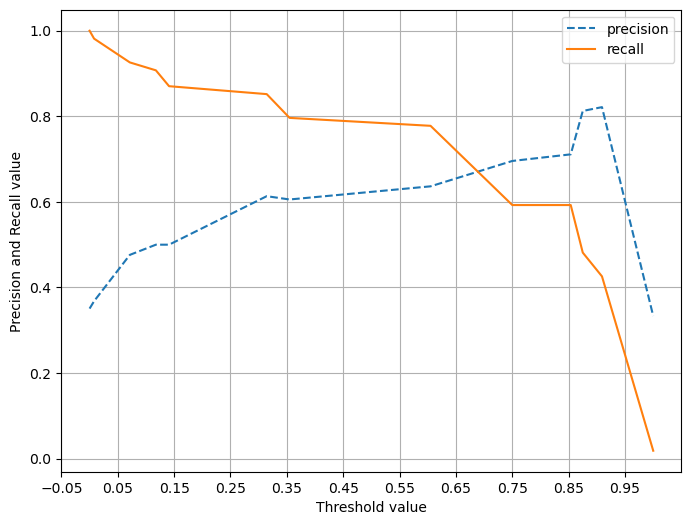

In [20]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))


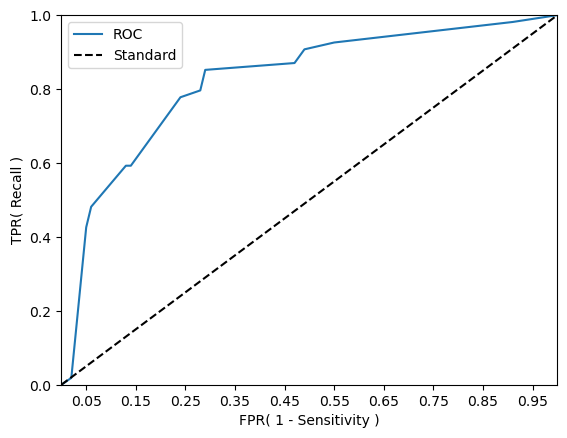

In [21]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### 🎈정리

In [22]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

features, targets = pima_df.iloc[:, :-1], pima_df.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': [5, 6, 7], 'min_samples_split': [7, 8, 9]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 5, 'min_samples_split': 7}",0.752433,2,0.725806,0.709677,0.774194
1,"{'max_depth': 5, 'min_samples_split': 8}",0.754045,1,0.741935,0.709677,0.774194
2,"{'max_depth': 5, 'min_samples_split': 9}",0.752433,2,0.725806,0.709677,0.774194
3,"{'max_depth': 6, 'min_samples_split': 7}",0.729640,5,0.677419,0.709677,0.822581
4,"{'max_depth': 6, 'min_samples_split': 8}",0.731306,4,0.677419,0.693548,0.822581
5,"{'max_depth': 6, 'min_samples_split': 9}",0.726388,6,0.677419,0.693548,0.822581
6,"{'max_depth': 7, 'min_samples_split': 7}",0.713564,9,0.596774,0.677419,0.741935
7,"{'max_depth': 7, 'min_samples_split': 8}",0.716843,8,0.596774,0.677419,0.741935
8,"{'max_depth': 7, 'min_samples_split': 9}",0.723347,7,0.612903,0.693548,0.741935


In [23]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 75.3247%


In [28]:
proba_class1 = dtc.predict_proba(X_test)[:, 1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.        , 0.008     , 0.07142857, 0.11764706, 0.14102564,
       0.31428571, 0.35483871, 0.60493827, 0.75      , 0.85365854,
       0.875     , 0.90909091, 1.        ])

In [25]:
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)

0.0
오차 행렬
[[ 7 93]
 [ 1 53]]
정확도: 0.3896, 정밀도: 0.3630, 재현율: 0.9815, F1: 0.5300, ROC-AUC: 0.5257
################################################################################
0.008
오차 행렬
[[43 57]
 [ 4 50]]
정확도: 0.6039, 정밀도: 0.4673, 재현율: 0.9259, F1: 0.6211, ROC-AUC: 0.6780
################################################################################
0.07142857142857142
오차 행렬
[[49 51]
 [ 5 49]]
정확도: 0.6364, 정밀도: 0.4900, 재현율: 0.9074, F1: 0.6364, ROC-AUC: 0.6987
################################################################################
0.11764705882352941
오차 행렬
[[51 49]
 [ 7 47]]
정확도: 0.6364, 정밀도: 0.4896, 재현율: 0.8704, F1: 0.6267, ROC-AUC: 0.6902
################################################################################
0.14102564102564102
오차 행렬
[[69 31]
 [ 8 46]]
정확도: 0.7468, 정밀도: 0.5974, 재현율: 0.8519, F1: 0.7023, ROC-AUC: 0.7709
################################################################################
0.3142857142857143
오차 행렬
[[70 30]
 [11 43]]
정확도: 0.7338, 정밀도: 0.5

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
_, _, thresholds = roc_curve(y_test, proba_class1)

In [27]:
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)

2.0
오차 행렬
[[100   0]
 [ 54   0]]
정확도: 0.6494, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, ROC-AUC: 0.5000
################################################################################
1.0
오차 행렬
[[100   0]
 [ 54   0]]
정확도: 0.6494, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, ROC-AUC: 0.5000
################################################################################
0.9090909090909091
오차 행렬
[[96  4]
 [53  1]]
정확도: 0.6299, 정밀도: 0.2000, 재현율: 0.0185, F1: 0.0339, ROC-AUC: 0.4893
################################################################################
0.875
오차 행렬
[[93  7]
 [31 23]]
정확도: 0.7532, 정밀도: 0.7667, 재현율: 0.4259, F1: 0.5476, ROC-AUC: 0.6780
################################################################################
0.8536585365853658
오차 행렬
[[92  8]
 [28 26]]
정확도: 0.7662, 정밀도: 0.7647, 재현율: 0.4815, F1: 0.5909, ROC-AUC: 0.7007
################################################################################
0.75
오차 행렬
[[85 15]
 [22 32]]
정확도: 0.7597, 정밀도: 0.6809, 재현율: 0.5926, F1: 0.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

##### 🚩정리

1. 여러 개의 임계값에 대한 정밀도와 재현율을 확인한다.
> precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)

2. 위의 임계값에 대한 다양한 평가 지표를 확인한다.
> get_evaluation_by_thresholds(y_test, proba_class1.reshape(-1, 1), thresholds)

3. 원하는 임계값으로 설정하여 다시 한 번 다양한 평가 지표를 확인한다.
> custom_proba = dtc.proba(X_test)[:, 1].reshape(-1, 1)
> prediction = Binarizer(threshold=0.52).fit_transform(custom_proba)
> get_evaluation(y_test, prediction, dtc, X_test)

4. 해당 임계값으로 설정된 모델의 prediction을 사용한다.